In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [59]:
df1_ratings = r"D:\exams i wrote\innomatics datascience internship test\datasets\ratings.csv"
df1_movies = r"D:\exams i wrote\innomatics datascience internship test\datasets\movies.csv"
df1_links = r"D:\exams i wrote\innomatics datascience internship test\datasets\links.csv"
df1_tags = r"D:\exams i wrote\innomatics datascience internship test\datasets\tags.csv"



In [60]:
ratings = pd.read_csv(df1_ratings)
movies = pd.read_csv(df1_movies)
links = pd.read_csv(df1_links)
tags = pd.read_csv(df1_tags)

In [61]:
movies.shape

(9742, 3)

In [62]:
ratings.shape

(100836, 4)

In [63]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [64]:
ratings["userId"].nunique()

610

In [65]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [66]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [67]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [68]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [69]:
result = pd.merge(ratings,movies)
#result = pd.merge(result,tags)
result = pd.merge(result,links)

In [70]:
result

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,118745,30948.0
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,66806,90351.0
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,798722,70193.0
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,1540011,351211.0


In [71]:
#Which movie has recieved maximum number of user ratings?

# Group by movieId and count the number of ratings for each movie
movie_ratings_count = result.groupby('movieId')['rating'].count()

# Find the movieId with the maximum number of ratings
max_ratings_movie_id = movie_ratings_count.idxmax()

# Get the movie details for the movie with the maximum ratings
max_ratings_movie = result[result['movieId'] == max_ratings_movie_id][['title', 'genres']].iloc[0]

# Display the result
print("Movie with the maximum number of ratings:")
print(max_ratings_movie)


Movie with the maximum number of ratings:
title          Forrest Gump (1994)
genres    Comedy|Drama|Romance|War
Name: 2426, dtype: object


In [72]:
#finding the matrix real movie id in our dataset

# Search for "Matrix, The (1999)" in the title column
matrix_movie = result[result['title'].str.contains('Matrix, The \(1999\)')]

# Display the result
print("MovieId for 'Matrix, The (1999)':")
print(matrix_movie[['movieId', 'title']])


MovieId for 'Matrix, The (1999)':
       movieId               title
12642     2571  Matrix, The (1999)
12643     2571  Matrix, The (1999)
12644     2571  Matrix, The (1999)
12645     2571  Matrix, The (1999)
12646     2571  Matrix, The (1999)
...        ...                 ...
12915     2571  Matrix, The (1999)
12916     2571  Matrix, The (1999)
12917     2571  Matrix, The (1999)
12918     2571  Matrix, The (1999)
12919     2571  Matrix, The (1999)

[278 rows x 2 columns]


In [73]:

#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
#another way but it was not working , we can try 

# Assuming your dataset has columns like 'userId', 'movieId', 'tag'
# Filter the dataset for tags related to "Matrix, The (1999)"
matrix_tags = result[(result['movieId'] == 2571) & (result['title'] == 'Matrix, The (1999)')]

# Extract the unique tags
unique_tags = matrix_tags['tag'].unique()

# Display the result
print("Tags submitted by users for 'Matrix, The (1999)':")
print(unique_tags)


KeyError: 'tag'

In [ ]:
#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?


# Assuming 'movieId' for "Matrix, The (1999)" is 2571
matrix_movie_id = 2571

# Filter the movie dataset for "Matrix, The (1999)"
matrix_movie = result[result['movieId'] == matrix_movie_id]


# Merge the movie dataset with the tag dataset on 'movieId'
matrix_tags = pd.merge(matrix_movie, tags, on='movieId')

# Extract the unique tags
unique_tags = matrix_tags['tag'].unique()

# Display the result
print("Tags submitted by users for 'Matrix, The (1999)':")
print(unique_tags)


Tags submitted by users for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [ ]:
#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?


# Assuming 'Terminator 2: Judgment Day (1991)' is the full title of the movie
movie_title = 'Terminator 2: Judgment Day (1991)'

# Filter the dataset for the movie
terminator2_ratings = result[result['title'] == movie_title]['rating']

# Calculate the average user rating
average_rating = terminator2_ratings.mean()

# Display the result
print(f"Average user rating for '{movie_title}': {average_rating:.2f}")


Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


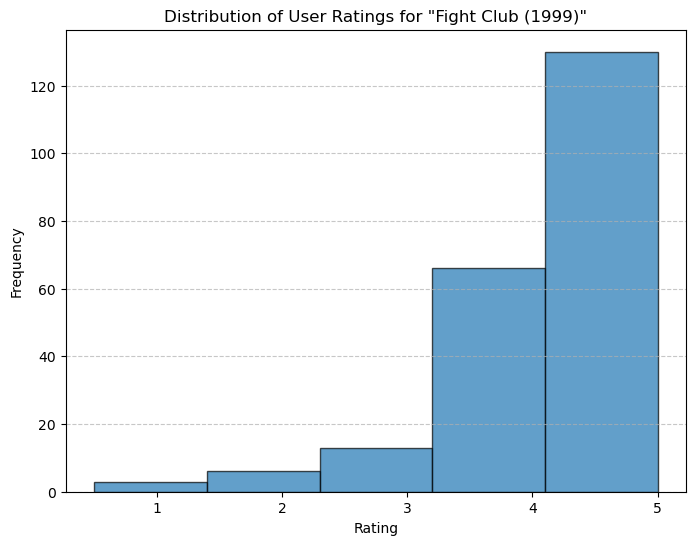

In [ ]:
#How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

# Assuming 'Fight Club (1999)' is the full title of the movie
movie_title = 'Fight Club (1999)'

# Filter the dataset for the movie
fight_club_ratings = result[result['title'] == movie_title]['rating']

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=5, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of User Ratings for "{movie_title}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
#IMPORTANT NOTE 1 🟢
'''Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.'''

In [ ]:
# Mandatory Operation 1: Group the user ratings based on movieId and apply aggregation operations
ratings_grouped = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

# Mandatory Operation 2: Apply inner join on the dataframe created from movies.csv and the grouped df from step 1
merged_df = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

# Mandatory Operation 3: Filter only those movies which have more than 50 user ratings
popular_movies = merged_df[merged_df['rating_count'] > 50]

popular_movies.to_csv("popular_movies.csv")

popular_movies = pd.read_csv("popular_movies.csv")



,Unnamed: 0,movieId,title,genres,rating_count,rating_mean
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
4,6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [ ]:
# Question 1: Which movie is the most popular based on average user ratings?
most_popular_movie = popular_movies[popular_movies['rating_mean'] == popular_movies['rating_mean'].max()]
print("Most popular movie based on average user ratings:")
print(most_popular_movie[['title', 'rating_mean']])

Most popular movie based on average user ratings:
                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


In [ ]:
# Question 2: Select all the correct options which come under top 5 popular movies based on the number of user ratings.
top5_popular_movies = popular_movies.nlargest(5, 'rating_count')
print("\nTop 5 popular movies based on the number of user ratings:")
print(top5_popular_movies[['title', 'rating_count']])


Top 5 popular movies based on the number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [ ]:
# Question 3: Which Sci-Fi movie is "third most popular" based on the number of user ratings?
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]
third_most_popular_sci_fi = sci_fi_movies.nlargest(3, 'rating_count').iloc[-1]
print("\nThird most popular Sci-Fi movie based on the number of user ratings:")
print(third_most_popular_sci_fi[['title', 'rating_count']])


Third most popular Sci-Fi movie based on the number of user ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [74]:
import pandas as pd
from imdb import IMDb

# Assuming you have the IMDb ID column in your dataset, replace 'your_imdb_id_column' with the actual IMDb ID column name
imdb_id_column = 'imdbId'



# Merge links with the subset of popular_movies
popular_movies_with_links = pd.merge(popular_movies, links, on='movieId', how='inner')

# Ensure that you replace 'your_imdb_id_column' with the actual IMDb ID column name in your dataset
imdb_id_column = 'imdbId'

# Create an instance of the IMDb class
ia = IMDb()

# Function to fetch additional information about a movie using IMDb ID
def get_imdb_info(imdb_id):
    try:
        movie = ia.get_movie(imdb_id)
        return {
            'imdb_id': imdb_id,
            'title': movie['title'],
            'genres': ', '.join(movie['genres']),
            'rating': movie.data['rating'],
            'votes': movie.data['votes']
        }
    except:
        return None

# Create IMDb URLs using the existing information
popular_movies_with_links['imdb_url'] = 'https://www.imdb.com/title/tt' + popular_movies_with_links[imdb_id_column].astype(str) + '/'

# Apply the function to fetch IMDb information for all movies
imdb_info = [get_imdb_info(imdb_id) for imdb_id in popular_movies_with_links[imdb_id_column]]

# Create a DataFrame from the fetched IMDb information
imdb_df = pd.DataFrame([info for info in imdb_info if info is not None])

# Find the movie with the highest IMDb rating
highest_imdb_movie = imdb_df.nlargest(1, 'rating')

# Find the "Sci-Fi" movie with the highest IMDb rating
highest_scifi_imdb_movie = imdb_df[imdb_df['genres'].str.contains('Sci-Fi', case=False)].nlargest(1, 'rating')

# Print the results
print("MovieId of the movie with the highest IMDb rating:", highest_imdb_movie['imdb_id'].values[0])
print("MovieId of the 'Sci-Fi' movie with the highest IMDb rating:", highest_scifi_imdb_movie['imdb_id'].values[0])
